<a href="https://colab.research.google.com/github/BYRic-F/Data_practice/blob/main/Copie_de_Premi%C3%A8re_partie_atelier_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/SeaJayEm/docs_formation/refs/heads/main/coffee_shop_dirty.csv"
df = pd.read_csv(url)
df.head()

,order_id,customer_id,date,city,channel,product,quantity,unit_price,promo_code,distance_km,delay_min,rating,comment,is_bad_review
0,O001802,C0031,13/01/2026 19:15,lyon,web,mocha,4,450,VIP,2.666312,18.0,1,Déçue… mocha froid et pas bon 😡,1
1,O001191,C0132,2025-10-24 12:28:00,Paris,STORE,americano,3,2.66,NaN,0.000000,14.7,5/5,"Accueil top, commande nickel.",0
2,O001818,C0384,2025-11-24 13:27:00,Paris,app,brownie,1,2.17,HAPPYHOUR,94.270272,184.8,4,"Parfait, rien à dire.",0
3,O000252,C0061,2025-11-21 12:19:00,Paris,App,LATTE,1,3.75,HAPPYHOUR,1.647199,14.8,5/5,"Très bon, je recommanderai 👍",0
4,O002506,C0235,2025-10-15 18:13:00,Paris,app,cappuccino,1,4.05,NaN,0.663955,20.1,5,"Accueil top, commande nickel. !!!",0


In [2]:
df['date'].sample(10)

,date
2599,2025-12-09 18:27:00
2134,2025-12-31 09:36:00
186,2025-12-09 19:42:00
1719,27/10/2025 12:25
2842,29/11/2025 13:45
1001,2025-12-21 08:46:00
1954,16-10-25 13h59
585,2025-10-04 14:46:00
1464,09/13/2025 02:03 PM
1440,2026-01-06 18:13:00


# Etape 1 : exploration rapide du df

In [3]:
df.shape

(3000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       3000 non-null   object 
 1   customer_id    3000 non-null   object 
 2   date           3000 non-null   object 
 3   city           2918 non-null   object 
 4   channel        2933 non-null   object 
 5   product        2935 non-null   object 
 6   quantity       3000 non-null   int64  
 7   unit_price     2917 non-null   object 
 8   promo_code     1118 non-null   object 
 9   distance_km    2773 non-null   float64
 10  delay_min      3000 non-null   float64
 11  rating         2798 non-null   object 
 12  comment        2464 non-null   object 
 13  is_bad_review  3000 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 328.3+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

,0
order_id,0
customer_id,0
date,0
city,82
channel,67
product,65
quantity,0
unit_price,83
promo_code,1882
distance_km,227


In [7]:
df.describe(include="all").T      # le include="all" permet d'avoir non seulement les objets non numériques mais aussi les colonnes "unique" et "top" et "freq"

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,3000,2955,O000040,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,3000,449,C0398,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,3000,2738,2025/12/01,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2918,163,Paris,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel,2933,49,app,467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,2935,192,latte,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,3000.0,NaN,NaN,NaN,1.436333,0.890811,-1.0,1.0,1.0,2.0,6.0
unit_price,2917,1069,2.18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promo_code,1118,4,WELCOME10,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_km,2773.0,NaN,NaN,NaN,2.599759,8.578497,0.0,0.280585,1.593765,2.856894,190.075644


In [8]:
df["is_bad_review"].value_counts(normalize=True)

,proportion
is_bad_review,
0,0.868667
1,0.131333


In [9]:
df['product'].unique()

array(['mocha', 'americano', ' brownie', 'LATTE', 'cappuccino',
       'AMERCIANO', 'cappuccino ', 'TEA', 'espresso', ' cappuccino',
       'tea', ' amerciano', 'Espresso', ' espresso', nan, 'cookie ',
       'Americano', 'CAPPUCCINO', ' amreicano', 'sandwich', 'COOKIE',
       'AMERICANO', 'mohca', 'Cappuccino', 'latte', 'BROWNIE', 'cookie',
       'MOCHA', 'latte ', 'SANDWICH', '  sandwich  ', '  mocha  ',
       '  latte  ', ' tea', 'capupccino', 'Sandwich', '  cookie  ',
       'Cookie', 'americano ', 'mocha ', 'sandwich ', 'Latte', 'ESPRESSO',
       'BORWNIE', ' cookie', '  espresso  ', 'brownie', 'Mocha', 'tea ',
       'Brownie', ' mocha', '  cappuccino  ', 'espresso ', 'OMCHA',
       '  americano  ', ' americano', 'Tea', 'ocokie ', '  brownie  ',
       '  omcha  ', 'espersso', ' latte', 'brownie ', ' s andwich  ',
       '  tea  ', 'cappcucino', ' eta', 'cokoie ', '  cpapuccino  ',
       'MOHCA', '  te a ', 'ocokie', '  sandiwch  ', '  maericano  ',
       'omcha', 'maerica

In [10]:
df['product'].value_counts()    # permet de voir aussi les valeurs uniques mais surtout leur répartition

,count
product,
latte,119
espresso,108
cookie,104
americano,90
tea,90
...,...
browine,1
cappuccnio,1
amerciano,1


# Etape 2 : nettoyage du df

## 2.1. Traitement des dates

In [11]:
df_clean = df.copy() # on commence par faire une copie pour ne pas toucher au df d'origine au cas où

# dayFirst = True permet de préciser qu'en cas de doute, le premier chiffre correspond au jour et non au mois (ex : 10/11/2025)
df_clean['date_parsed'] = pd.to_datetime(df_clean['date'], format='mixed', dayfirst=True, errors='coerce')
df_clean['date_parsed']

df_clean['hour'] = df_clean['date_parsed'].dt.hour
df_clean['time'] = df_clean['date_parsed'].dt.time
df_clean['dayofweek'] = df_clean['date_parsed'].dt.dayofweek
df_clean['is_weekend'] = df_clean['dayofweek'].isin([5,6]).astype(int)
df_clean.head(10)

,order_id,customer_id,date,city,channel,product,quantity,unit_price,promo_code,distance_km,delay_min,rating,comment,is_bad_review,date_parsed,hour,time,dayofweek,is_weekend
0,O001802,C0031,13/01/2026 19:15,lyon,web,mocha,4,450,VIP,2.666312,18.0,1,Déçue… mocha froid et pas bon 😡,1,2026-01-13 19:15:00,19,19:15:00,1,0
1,O001191,C0132,2025-10-24 12:28:00,Paris,STORE,americano,3,2.66,NaN,0.000000,14.7,5/5,"Accueil top, commande nickel.",0,2025-10-24 12:28:00,12,12:28:00,4,0
2,O001818,C0384,2025-11-24 13:27:00,Paris,app,brownie,1,2.17,HAPPYHOUR,94.270272,184.8,4,"Parfait, rien à dire.",0,2025-11-24 13:27:00,13,13:27:00,0,0
3,O000252,C0061,2025-11-21 12:19:00,Paris,App,LATTE,1,3.75,HAPPYHOUR,1.647199,14.8,5/5,"Très bon, je recommanderai 👍",0,2025-11-21 12:19:00,12,12:19:00,4,0
4,O002506,C0235,2025-10-15 18:13:00,Paris,app,cappuccino,1,4.05,NaN,0.663955,20.1,5,"Accueil top, commande nickel. !!!",0,2025-10-15 18:13:00,18,18:13:00,2,0
5,O001118,C0080,2025-12-16 18:51:00,Marseille,web,AMERCIANO,1,2.29,HAPPYHOUR,2.792031,26.6,1,"Trop long, 27 min d'attente, inadmissible.",1,2025-12-16 18:51:00,18,18:51:00,1,0
6,O001412,C0400,2025-10-19 13:42:00,Lyon,app,cappuccino,1,3.59,NaN,0.424085,18.4,4/5,Super cappuccino ! Rapide et délicieux 😍,0,2025-10-19 13:42:00,13,13:42:00,6,1
7,O002114,C0193,11/14/2025 01:45 PM,bordeaux,web,TEA,1,2.72,HAPPYHOUR,1.545151,14.3,4,"livraison rapide, produit conforme.",0,2025-11-14 13:45:00,13,13:45:00,4,0
8,O000409,C0197,2025-11-11 13:49:00,Paris,app,espresso,2,1.35,VIP,3.242347,25.6,5/5,"Parfait, rien à dire.",0,2025-11-11 13:49:00,13,13:49:00,1,0
9,O002580,C0406,2025/09/02,paris,web,cappuccino,1,3.94,NaN,1.368257,12.5,4,NaN,0,2025-09-02 00:00:00,0,00:00:00,1,0


In [12]:
df_clean.dtypes   # pour vérifier le format de date_parsed

,0
order_id,object
customer_id,object
date,object
city,object
channel,object
product,object
quantity,int64
unit_price,object
promo_code,object
distance_km,float64


## 2.2. Traitement des catégories (city, channel), product, promo_code

In [13]:
for col in ["city", "channel", "product", "promo_code"]:
    df_clean[col] = (
        df_clean[col]
        .str.replace(" ", "")
        .str.lower()
        .replace({"": np.nan, "nan": np.nan, "<NA>": np.nan}) # on remplace les espaces vides et les 'nan' en texte par des vrais nan
    )
df_clean.sample(5)

# on peut aussi utiliser un dictionnaire dans replace pour gérer les coquilles telles que parsi pour paris etc

,order_id,customer_id,date,city,channel,product,quantity,unit_price,promo_code,distance_km,delay_min,rating,comment,is_bad_review,date_parsed,hour,time,dayofweek,is_weekend
1575,O000311,C0033,2026-01-01 12:53:00,lyon,web,espresso,1,1.84,vip,4.001721,26.7,5,NaN,0,2026-01-01 12:53:00,12,12:53:00,3,0
1758,O001701,C0099,12/01/2026 17:23,toulouse,app,sanwdich,2,5.32,NaN,2.715579,18.8,5,Super sandwich ! Rapide et délicieux 😍,0,2026-01-12 17:23:00,17,17:23:00,0,0
2017,O001823,C0295,28-10-25 10h07,lyon,app,tea,1,25.05,NaN,1.877001,15.4,4,"parfait, rien à dire. !!!",0,2025-10-28 10:07:00,10,10:07:00,1,0
2305,O000771,C0225,2025/10/24,bordeaux,app,sandwich,4,5.83,welcome10,0.890233,21.2,1,"Très bon, je recommanderai 👍",0,2025-10-24 00:00:00,0,00:00:00,4,0
2377,O000358,C0055,2025-11-07 12:42:00,paris,app,latte,1,"4,38",happyhour,1.368843,21.7,5,"Parfait, rien à dire.",0,2025-11-07 12:42:00,12,12:42:00,4,0


## 2.3. Traitement des données numériques

In [14]:
df_clean["unit_price"].sample(10)

,unit_price
1661,2.18
790,6.04
1669,2.58
1034,2.43
900,181
141,2.57
2365,1.47
2330,3.66€
966,4.42
2668,"3,76"


On a des € et un mélange de . et de ,, et la colonne n'est pas en float.

In [15]:
def parse_price(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower().replace('€', '').replace(',', '.')
    try:
        return float(s)
    except:
        return np.nan

df_clean["unit_price_num"] = df_clean["unit_price"].apply(parse_price)

df_clean["unit_price_num"].sample(5)

,unit_price_num
17,167.00
2437,2.44
562,NaN
2425,1.31
1183,1.44


In [16]:
df_clean["rating"].sample(10)

,rating
2453,NaN
1038,4
498,4
795,5
1819,5
2020,NaN
729,5
1262,4
1663,1
1367,4


On a des "/5".

In [17]:
def parse_rating(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if "/5" in s:
        s = s.replace("/5", "")
    try:
        return float(s)
    except:
        return np.nan

df_clean["rating_num"] = df_clean["rating"].apply(parse_rating)

<Axes: title={'center': 'Distribution des notes'}, ylabel='Frequency'>

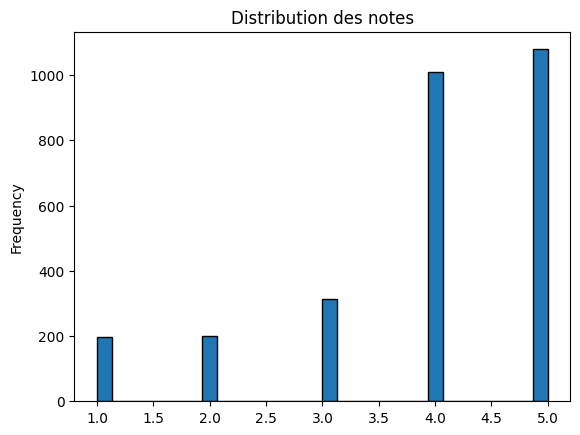

In [18]:
df_clean["rating_num"].plot(kind='hist', bins=30, title="Distribution des notes", edgecolor='black')

In [19]:
df_clean["quantity"].sample(10)

,quantity
2287,1
1518,2
2344,1
249,2
295,1
434,2
945,1
2309,1
1132,2
1018,1


On a des -1.

<Axes: title={'center': 'Distribution des quantités'}, ylabel='Frequency'>

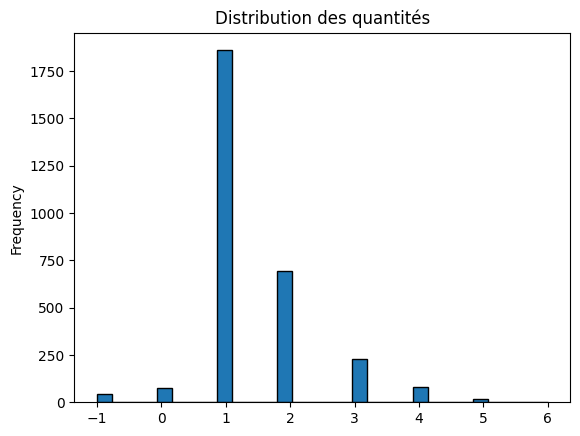

In [20]:
df_clean["quantity"].plot(kind='hist', bins=30, title="Distribution des quantités", edgecolor='black')

In [21]:
df_clean["quantity_num"] = df_clean["quantity"].where(df_clean["quantity"] >= 0, np.nan)

<Axes: title={'center': 'Distribution des quantités'}, ylabel='Frequency'>

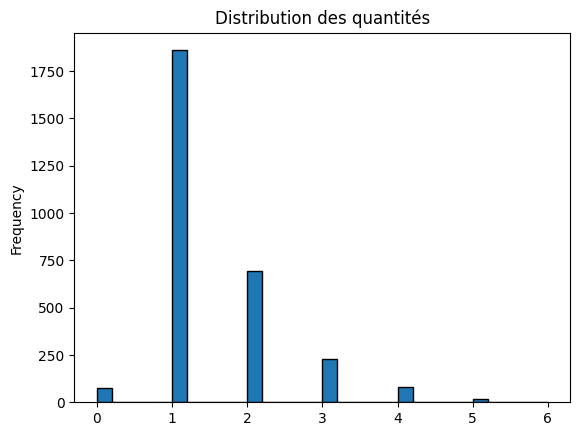

In [22]:
df_clean["quantity_num"].plot(kind='hist', bins=30, title="Distribution des quantités", edgecolor='black')

<Axes: title={'center': 'Distribution des délais'}, ylabel='Frequency'>

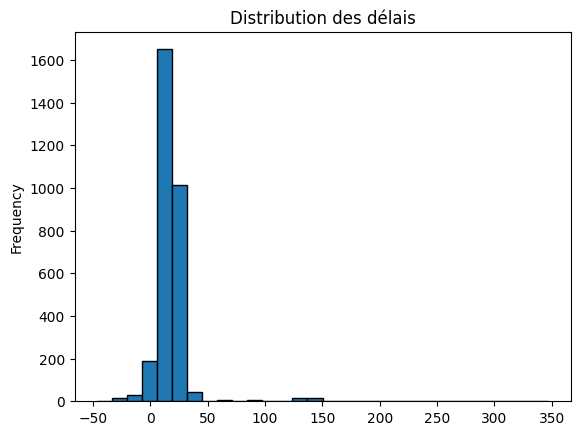

In [23]:
df_clean["delay_min"].plot(kind='hist', bins=30, title="Distribution des délais", edgecolor='black')

On a des valeurs négatives et des valeurs très hautes, qu'on va remplacer par des NaN.

In [24]:
df_clean["delay_min_num"] = df_clean["delay_min"].where((df_clean["delay_min"] >= 0) & (df_clean["delay_min"] <= 180), np.nan)

<Axes: title={'center': 'Distribution des délais'}, ylabel='Frequency'>

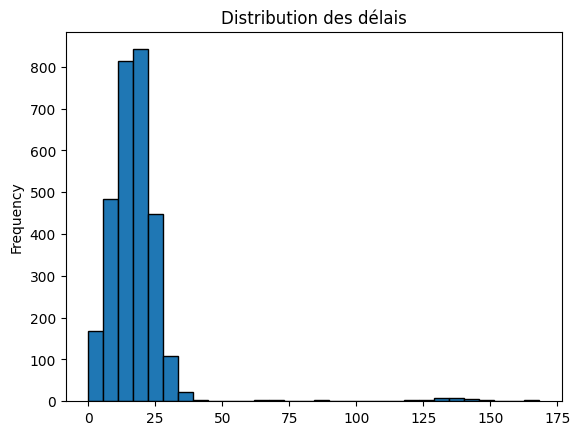

In [25]:
df_clean["delay_min_num"].plot(kind='hist', bins=30, title="Distribution des délais", edgecolor='black')

<Axes: title={'center': 'Distribution des distances'}, ylabel='Frequency'>

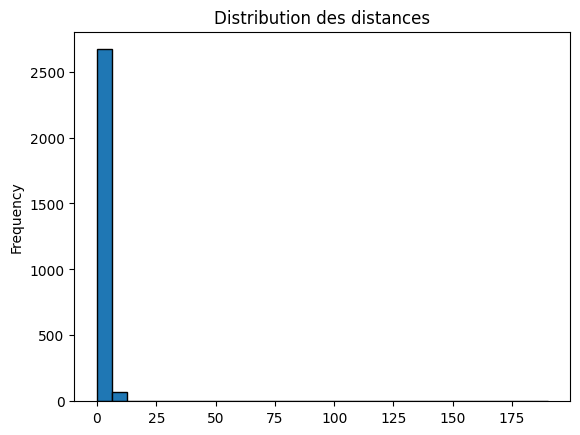

In [26]:
df_clean["distance_km"].plot(kind='hist', bins=30, title="Distribution des distances", edgecolor='black')

Je ne touche à rien ici.

In [27]:
# on ne garde que les colonnes nettoyées.
df_clean = df_clean[[
    "customer_id","order_id","city","channel","product","promo_code",
    "unit_price_num","quantity_num","distance_km","delay_min_num",
    "hour","dayofweek","is_weekend","time","rating_num","comment","is_bad_review"
]]

In [28]:
df_clean.sample(5)

,customer_id,order_id,city,channel,product,promo_code,unit_price_num,quantity_num,distance_km,delay_min_num,hour,dayofweek,is_weekend,time,rating_num,comment,is_bad_review
577,C0163,O000811,lille,app,borwnie,NaN,227.00,1.0,1.867697,22.0,18,3,0,18:19:00,4.0,NaN,0
2329,C0264,O001669,apris,web,espresso,NaN,1.57,1.0,0.386118,26.9,18,4,0,18:01:00,4.0,"Livraison rapide, produit conforme.",0
1356,C0367,O000687,paris,app,cookie,NaN,1.81,1.0,NaN,0.5,20,1,0,20:43:00,5.0,"Livraison rapide, produit conforme.",0
2909,C0078,O002236,paris,store,brownie,vip,2.18,2.0,0.000000,17.6,12,4,0,12:10:00,3.0,"J'adore ce café, merci ! ☕ !!!",0
1210,C0048,O000874,lille,sotre,latte,NaN,3.82,3.0,NaN,14.7,13,0,0,13:54:00,1.0,"Service catastrophique, je ne reviendrai pas.",1


In [29]:
df_clean.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,3000,449,C0398,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,3000,2955,O000040,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,2918,41,paris,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel,2933,10,app,1507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,2935,53,espresso,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promo_code,1118,4,welcome10,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_price_num,2917.0,NaN,NaN,NaN,26.546514,123.809391,1.07,2.16,2.91,4.03,3641.0
quantity_num,2954.0,NaN,NaN,NaN,1.474272,0.843803,0.0,1.0,1.0,2.0,6.0
distance_km,2773.0,NaN,NaN,NaN,2.599759,8.578497,0.0,0.280585,1.593765,2.856894,190.075644
delay_min_num,2937.0,NaN,NaN,NaN,18.324242,15.335006,0.0,11.9,16.9,21.7,168.2


In [30]:
df_clean.info()     # on vérifie les types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     3000 non-null   object 
 1   order_id        3000 non-null   object 
 2   city            2918 non-null   object 
 3   channel         2933 non-null   object 
 4   product         2935 non-null   object 
 5   promo_code      1118 non-null   object 
 6   unit_price_num  2917 non-null   float64
 7   quantity_num    2954 non-null   float64
 8   distance_km     2773 non-null   float64
 9   delay_min_num   2937 non-null   float64
 10  hour            3000 non-null   int32  
 11  dayofweek       3000 non-null   int32  
 12  is_weekend      3000 non-null   int64  
 13  time            3000 non-null   object 
 14  rating_num      2798 non-null   float64
 15  comment         2464 non-null   object 
 16  is_bad_review   3000 non-null   int64  
dtypes: float64(5), int32(2), int64(2)

## 2.4. Traitement du texte

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

nltk.download('stopwords')
nltk.download('punkt_tab')

# Importation des stopwords
stops = stopwords.words('french')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [32]:
stops.remove("pas")

In [33]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
import re

def func_clean(text):

    if not isinstance(text, str):
        return ""

    text = text.lower()

    # emojis ☕ 😡 ❤️ 👍
    text = re.sub(
    r"[\U0001F000-\U0010FFFF\u2600-\u26FF]",
    "",
    text
    )

    # apostrophes françaises
    text = re.sub(r"[’']", " ", text)


    # points de suspension
    text = re.sub(r"\.{3,}", " ", text)
    text = re.sub("…", " ", text)

    # tokenisation
    words = word_tokenize(text, language="french")

    # stopwords + ponctuation
    words = [
        w for w in words
        if w not in stops
        and w not in punctuation
    ]

    return " ".join(words)

func_clean("j'adore café merci ☕")

'adore café merci'

In [35]:
df_clean['comment'] = df_clean['comment'].fillna("").astype(str).apply(func_clean)

In [36]:
df_clean['comment']

,comment
0,déçue mocha froid pas bon
1,accueil top commande nickel
2,parfait rien dire
3,très bon recommanderai
4,accueil top commande nickel
...,...
2995,parfait rien dire
2996,super brownie rapide délicieux
2997,adore café merci
2998,


# Etape 3 : Définir X / y pour la classification

In [101]:
target = "is_bad_review"

feature_cols = [
    "city", "channel", "product", "promo_code",
    "unit_price_num", "quantity_num", "distance_km", "delay_min_num",
    "hour", "dayofweek", "is_weekend",
    "comment"
]

X = df_clean[feature_cols].copy()
y = df_clean[target].astype(int)

# Etape 4 : Train/Test split

## 4.1. Démonstration de l'intérêt du Train/Test split

In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# dataset généré
X_demo, y_demo = make_regression(
    n_samples=100,
    n_features=10,
    noise=10,
    random_state=42
)

model = RandomForestRegressor(max_depth=10, random_state=42)
# TRICHE
model.fit(X_demo, y_demo)
print("R² tout dataset :", r2_score(y_demo, model.predict(X_demo)))

# EXAMEN
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(
    X_demo, y_demo, test_size=0.3, random_state=42
)

model.fit(X_train_demo, y_train_demo)
print("R² test :", r2_score(y_test_demo, model.predict(X_test_demo)))


R² tout dataset : 0.9558603264642931
R² test : 0.6308580067574556


## 4.2. Train/Test split avec et sans Stratify

In [102]:
# sans stratify

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    random_state=42
)

In [40]:
y.value_counts(normalize=True), y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(is_bad_review
 0    0.868667
 1    0.131333
 Name: proportion, dtype: float64,
 is_bad_review
 0    0.869167
 1    0.130833
 Name: proportion, dtype: float64,
 is_bad_review
 0    0.866667
 1    0.133333
 Name: proportion, dtype: float64)

In [41]:
# avec stratify

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    random_state=42,
    stratify=y
)

In [42]:
y.value_counts(normalize=True), y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)  # répartition nickel

(is_bad_review
 0    0.868667
 1    0.131333
 Name: proportion, dtype: float64,
 is_bad_review
 0    0.86875
 1    0.13125
 Name: proportion, dtype: float64,
 is_bad_review
 0    0.868333
 1    0.131667
 Name: proportion, dtype: float64)

## 4.2. Création de pipeline

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Séparation des features
numeric_features = [
    "unit_price_num", "quantity_num", "distance_km", "delay_min_num",
    "hour", "dayofweek", "is_weekend",
]

categorical_features = [
    "city", "channel", "product", "promo_code"
]

nlp_features = ["comment"]

In [132]:
#Creation des transformers

numeric_transformers = Pipeline(steps =[
                  ('imputer', SimpleImputer(strategy = "median")),
                  ('scaler', StandardScaler())
                  ])

categorical_transformers = Pipeline(steps = [
                ('imputer', SimpleImputer(strategy = "most_frequent")),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

nlp_transformers = Pipeline(steps = [
                  ('tfifd', TfidfVectorizer(min_df =3, max_features=5000,ngram_range=(1,2)))
])


In [133]:
#Preprocessor

preprocessor = ColumnTransformer(transformers = [
        ('num', numeric_transformers, numeric_features),
        ('cat', categorical_transformers, categorical_features),
        ('nlp', nlp_transformers, nlp_features[0])
])

In [136]:
#Pipeline final

pipeline_final = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter = 300, class_weight = "balanced"))
])

In [144]:
pipeline_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['unit_price_num',
                                                   'quantity_num',
                                                   'distance_km',
                                                   'delay_min_num', 'hour',
                                                   'dayofweek', 'is_weekend']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'channel', 'product',
                                                   'promo_code']),
                                                 ('nlp',
                                                  Pipeline(steps=[('tfifd',
                                                                   TfidfVectorizer(max_features=5000,
                                                                                   min_df=3,
                                                                                   ngram_range=(1,
                                                                                                2)))]),
                                                  'comment')])),
                ('model', LogisticRegression())])

In [145]:
#Entrainement
from sklearn.metrics import accuracy_score, classification_report
pipeline_final.fit(X_train, y_train)

pred_full_lr = pipeline_final.predict(X_test)



In [146]:
print("Accuracy test : ", pipeline_final.score(X_test, y_test))
print("Accuracy train : ", pipeline_final.score(X_train, y_train))

Accuracy test :  0.965
Accuracy train :  0.9754166666666667


In [148]:
print("Rapport de classification : \n", classification_report(y_test, pred_full_lr))

Rapport de classification : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       520
           1       1.00      0.74      0.85        80

    accuracy                           0.96       600
   macro avg       0.98      0.87      0.91       600
weighted avg       0.97      0.96      0.96       600

